In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
path = 'data/'
stocks = [ "NOKIA", "AXA", "BNP", "LVMH"]
N = 4

In [2]:
dfs = []
for i in range(N):
    name = stocks[i]
    dfs.append(pd.read_csv(path + "{}_simple.csv".format(name)))
# TODO seasonality of duration (over weekday / intraday)

In [3]:
for df in dfs:
    print(df["DURATION"].mean())

22.706156034360944
4.769126427442523
3.319905672678409
5.4595143123941465


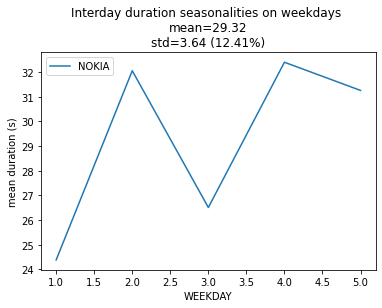

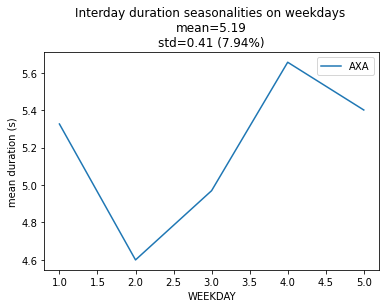

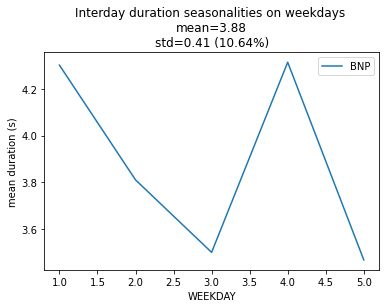

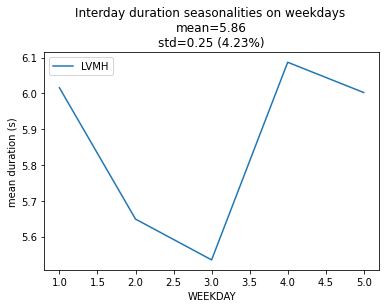

In [15]:
for i in range(N):
    df = dfs[i][dfs[i].ESTIMATION]
    df_local = (df.groupby("WEEKDAY").mean().DURATION)
    df_local.plot(ylabel="mean duration (s)",
                  title="Interday duration seasonalities on \
weekdays \nmean={:.2f}\nstd={:.2f} ({:.2f}%)".format(
                      df_local.mean(),                                                                                                            
                      df_local.std(),
                      df_local.std() / df_local.mean() * 100
                  ),

                  label=stocks[i])
    plt.legend()
    plt.show()

# Longer duration on Monday, short duration on Friday.
# 4 >= 1 ~ 5 > 2 > 3
# NOKIA outlier.

In [4]:
def rms(values):
    return np.sqrt((values**2).sum()/len(values))

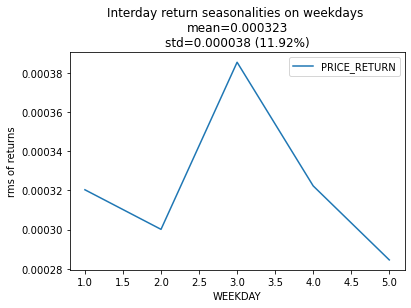

In [5]:
label = "PRICE_RETURN"
df_local = df[["WEEKDAY", label]].groupby("WEEKDAY").agg({label : rms})
df_local.plot(ylabel="rms of returns",
              title="Interday return seasonalities on \
weekdays \nmean={:.6f}\nstd={:.6f} ({:.2f}%)".format(
                  df_local.mean()[0],
                  df_local.std()[0],
                  df_local.std()[0] / df_local.mean()[0] * 100
              ),
              label=stocks[i])
plt.legend()